In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('S2.png')
#convert to gray image
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#display images
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray),plt.title('gray')
plt.xticks([]), plt.yticks([])
plt.show()



In [ ]:
#gaussian blur filter kernel size is 7*7 and (sigma = 1)
blur = cv.GaussianBlur(img,(7,7),1)
plt.imshow(blur)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#median filter with kernel size 19
median = cv.medianBlur(blur,19)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#show histogram of the gray image
grayhist=plt.hist(gray.ravel(), bins=255)
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.title('Gray image histogram')
plt.grid(True)
plt.show()


In [ ]:
#equalized the gray image
equ = cv.equalizeHist(gray)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(equ),plt.title('equalization')
plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
#display result of histogram of eqalization
plt.hist(equ.ravel(), bins=255)
plt.show()

In [ ]:
#extract hist, bins from histogram
hist, bins = np.histogram(img, bins=256, range=(0,256))

#print("hist",hist)
new_bins=np.delete(bins,256)
#print("bins",new_bins)
#calculate pdf 
hist_sums=np.sum(hist)
pdf=hist/hist_sums
#print(pdf)
#plt.figure()

import pandas as pd
df_bins = pd.DataFrame(new_bins, columns = ['bins'])
#print(df_bins)

df_hist = pd.DataFrame(hist, columns = ['hist'])
#print(df_hist)

df_pdf = pd.DataFrame(pdf, columns = ['pdf'])
#print(df_pdf)


cdf = pdf.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

df_cdf = pd.DataFrame(cdf, columns = ['cdf'])
#print(df_cdf)

df_cdf_normalized = pd.DataFrame(cdf_normalized, columns = ['cdf_normalized'])
#print(df_cdf_normalized)

pd.set_option('display.max_rows', 256)
result = pd.concat([df_bins, df_hist, df_pdf, df_cdf, df_cdf_normalized], axis=1)
print(result)
plt.xlabel('bins')
plt.ylabel('hist')
plt.title('plot')
#plt.plot(new_bins, hist, color='b', label="hist")
plt.plot(new_bins, pdf, color='r', label="pdf")
plt.plot(new_bins, cdf, color='g', label="cdf")
#plt.plot(bins, pdf, color='r', label="pdf")
plt.legend();
plt.show()

#plt.plot(cdf_normalized, color = 'b')
#plt.hist(img.flatten(),256,[0,256], color = 'r')
#plt.xlim([0,256])
#plt.legend(('cdf','histogram'), loc = 'upper left')
#plt.show()


In [ ]:
#save and display dataframe in a text
result.to_csv("xray1.txt", sep = '\t')
np.savetxt('xray2.txt', result, delimiter=',')


In [ ]:
# put a mask on dataframe return bins between 100 and 200
def df_limited(df, min_val, max_val):
    return df[(min_val <= df.bins) & (df.bins <= max_val)]
#df_limited(result,100,200)

In [ ]:
f = open('xray1.txt', 'w+')
W=df_limited(result,100,200)
f.write(str(W))
f.close()

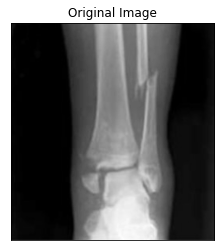

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('original image.png')
#convert to gray image
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)


#using oop to implement diffrent edge detection on image

class edge_detect():
    
    def __init__(self,name=gray):
        self.name=name
    def original_image(self):
        plt.imshow(self.name,cmap = 'gray')
        plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    
    def sobelx(self):
        sobelx1 = cv.Sobel(self.name,cv.CV_64F,1,0,ksize=5) # x-axis
        sobely1 = cv.Sobel(self.name,cv.CV_64F,0,1,ksize=5) # y-axis
        combined_sobel=cv.bitwise_or(sobelx1,sobely1)
        plt.imshow(sobelx1),plt.title('sobel X-Axis')
        plt.show()
    def sobely(self):
        sobelx1 = cv.Sobel(self.name,cv.CV_64F,1,0,ksize=5) # x-axis
        sobely1 = cv.Sobel(self.name,cv.CV_64F,0,1,ksize=5) # y-axis
        combined_sobel=cv.bitwise_or(sobelx1,sobely1)
        plt.imshow(sobely1),plt.title('Sobel Y-Axis')
        plt.show()
    def sobelcombine(self):
        sobelx1 = cv.Sobel(self.name,cv.CV_64F,1,0,ksize=5) # x-axis
        sobely1 = cv.Sobel(self.name,cv.CV_64F,0,1,ksize=5) # y-axis
        combined_sobel=cv.bitwise_or(sobelx1,sobely1)
       # plt.figure(figsize=[100,100])
        plt.imshow(combined_sobel),plt.title('combined_sobel')
        plt.show()
    
    def laplacian(self):
        laplacian1 = cv.Laplacian(self.name, cv.CV_64F)
        laplacian1=np.uint8(np.absolute(laplacian1))
        plt.imshow(laplacian1),plt.title('Laplacian Edge Detection View')
        plt.show()
        
    def canny(self):
        canny = cv.Canny(self.name,50,200)
        plt.imshow(canny,cmap = 'gray'),plt.title('Canny Edge Detection View')
    def HoughLines(self):
        lines = cv.HoughLinesP(canny, 1, np.pi/180, max_slider, minLineLength=10, maxLineGap=250)
        # Draw lines on the image
        for line in lines:
          x1, y1, x2, y2 = line[0]
          cv.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
        # Show result
        plt.imshow("Result Image", img)


edge_detect_obj= edge_detect(gray)
edge_detect_obj.original_image()
#edge_detect_obj.HoughLines()

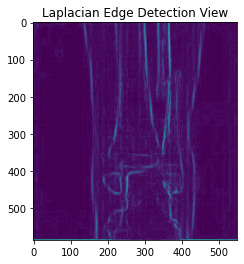

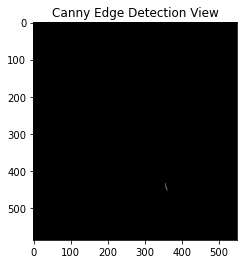

In [3]:
edge_detect_obj.laplacian()
edge_detect_obj.canny()

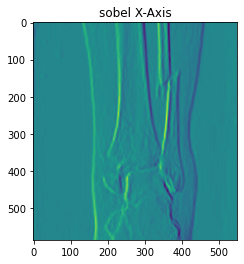

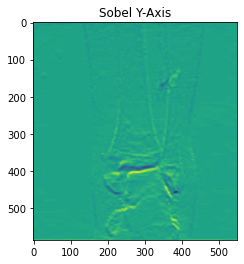

C:\Users\zahra\anaconda3\lib\site-packages\matplotlib\image.py:479: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


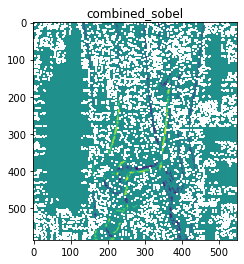

In [4]:
edge_detect_obj.sobelx()
edge_detect_obj.sobely()
edge_detect_obj.sobelcombine()

In [ ]:
import sys
import math
import cv2 as cv
import numpy as np
# HoughLines function is for detecting every straight lines in the image
def HoughLines():
    
    default_file = 'im2.png'
    filename = default_file
    # Loads an image
    src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)
    # Check if image is loaded fine
#    if src is None:
#        print ('Error opening image!')
#        print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
#        return -1
    
   # laplacian1 = cv.Laplacian(src, cv.CV_64F)
    #dst=np.uint8(np.absolute(laplacian1))
    #dst = cv.Sobel(src,cv.CV_64F,1,0,ksize=5)
    dst = cv.Canny(src, 50, 200, None, 3)
    
    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)
    
    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
    
    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    
    cv.imshow("Source", src)
    cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
    cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)
    
    cv.waitKey()
    return 0
    
HoughLines() #calling function